In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
import highlight_text
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer import Pitch, VerticalPitch
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
import soccerdata as sd
import re
from unidecode import unidecode

pd.set_option("display.max_rows", None, "display.max_columns", None)
background = "black"
text_color = 'w'
primary = '#C8102E'
secondary = 'lightblue'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

# setup a mplsoccer FontManager to download google fonts (Roboto-Regular / SigmarOne-Regular)
fm = FontManager()
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
                       'RubikMonoOne-Regular.ttf')

[09/02/24 19:22:20] INFO     No custom team name replacements found. You can configure these in       ]8;id=467286;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=231831;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\_config.py#90\90]8;;\
                             C:\Users\acer\soccerdata\config\teamname_replacements.json.                           

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=458621;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=382636;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\_config.py#196\196]8;;\
                             C:\Users\acer\soccerdata\config\league_dict.json.                                     

## FotMob

In [36]:
# Define the function to scrape shot data for a given matchId
def scrape_shots(mi):
    try: 
        params = {'matchId': mi}
        response = requests.get('https://www.fotmob.com/api/matchDetails', params=params)
        data = response.json()
        shotmap = data['content']['shotmap']['shots']
        shots_df = pd.DataFrame(shotmap)
        shots_df['matchId'] = mi
        return shots_df
    except Exception as e:
        print("Data not able to be scraped for MatchID : ",mi)

# Read the CSV containing the team names according to their respective Fotmob teamId
df_teamNameId = pd.read_csv("pl_team_name_and_id.csv")

# Define your list of matchIds (mi)
first_matchId = 4506263
last_matchId = 4506292
match_ids = [first_matchId + i for i in range(30)]  

# Initialize an empty list to store individual DataFrames
all_shots_dfs = []

# Loop through each matchId, scrape the shots data, merge with team names, and append to the list
for fotmob_matchId in match_ids:
    #print(fotmob_matchId)
    shots_df = scrape_shots(fotmob_matchId)
    if shots_df is not None:
        shots_df = shots_df.merge(df_teamNameId[['teamId', 'teamName']], on='teamId', how='left')
    
        # Adding the opposition team name column
        team1 = shots_df['teamName'].unique()[0]
        team2 = shots_df['teamName'].unique()[1]
        
        def get_opposite_teamName(team):
            if team == team1:
                return team2
            elif team == team2:
                return team1
            else:
                return None
    
        # Apply the function to create the new column
        shots_df['oppositeTeam'] = shots_df['teamName'].apply(get_opposite_teamName)
        
        # Append the DataFrame to the list
        all_shots_dfs.append(shots_df)

# Concatenate all DataFrames in the list into a single DataFrame
final_shots_df = pd.concat(all_shots_dfs, ignore_index=True)

# Cross cheking if all the data has extracted succesfully or not
print(len(final_shots_df))

771


C:\Users\acer\AppData\Local\Temp\ipykernel_11332\2022273484.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_shots_df = pd.concat(all_shots_dfs, ignore_index=True)


In [126]:
# Save DataFrame to CSV with overwrite enabled
final_shots_df.to_csv('PL_2024_25_Shots.csv', index=False)

## WhoScored

In [132]:
ws = sd.WhoScored(leagues="ENG-Premier League", seasons="2024/2025")


match_ids = [1821051,1821065,1821078]
all_events_dfs = []

for whoscoredid in match_ids:
    df_whoscored = ws.read_events(match_id=whoscoredid)
    all_events_dfs.append(df_whoscored)

# Concatenate all DataFrames in the list into a single DataFrame
city_events_df = pd.concat(all_events_dfs, ignore_index=False)

[09/06/24 13:22:37] INFO     Saving cached data to C:\Users\acer\soccerdata\data\WhoScored           ]8;id=191650;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=794634;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\_common.py#263\263]8;;\

[09/06/24 13:22:56] INFO     Retrieving calendar for ENG-Premier League 2425                       ]8;id=977241;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=756348;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#371\371]8;;\

[09/06/24 13:23:08] INFO     [1/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=88855;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=95947;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:23:18] INFO     [2/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=344404;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=444176;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:23:26] INFO     [3/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=47925;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=776000;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:23:33] INFO     [4/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=249839;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=289000;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:23:41] INFO     [5/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=155087;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=141098;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:23:48] INFO     [6/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=87681;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=265036;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:23:58] INFO     [7/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=536609;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=481813;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:24:08] INFO     [8/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=133339;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=314155;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:24:15] INFO     [9/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=42149;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=538591;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:24:21] INFO     [10/10] Retrieving fixtures for ENG-Premier League 2425               ]8;id=63161;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=743395;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py:424: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(all_schedules)


[09/06/24 13:24:27] INFO     [1/1] Retrieving game with id=1821051                                 ]8;id=962637;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=784610;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#692\692]8;;\

[09/06/24 13:24:40] INFO     Retrieving calendar for ENG-Premier League 2425                       ]8;id=223024;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=248030;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#371\371]8;;\

[09/06/24 13:24:50] INFO     [1/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=261091;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=228506;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:24:58] INFO     [2/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=859976;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=415285;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:25:04] INFO     [3/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=382379;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=511419;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:25:12] INFO     [4/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=568640;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=720325;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:25:21] INFO     [5/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=748355;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=428745;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:25:28] INFO     [6/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=339918;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=812962;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:25:38] INFO     [7/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=742279;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=784349;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:25:44] INFO     [8/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=671346;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=227778;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:25:53] INFO     [9/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=795001;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=166;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:25:59] INFO     [10/10] Retrieving fixtures for ENG-Premier League 2425               ]8;id=609925;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=466503;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py:424: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(all_schedules)


[09/06/24 13:26:08] INFO     [1/1] Retrieving game with id=1821065                                 ]8;id=103556;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=875739;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#692\692]8;;\

[09/06/24 13:26:21] INFO     Retrieving calendar for ENG-Premier League 2425                       ]8;id=322576;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=89749;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#371\371]8;;\

[09/06/24 13:26:33] INFO     [1/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=867828;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=599628;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:26:43] INFO     [2/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=311505;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=802439;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:26:52] INFO     [3/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=115206;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=908356;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:26:58] INFO     [4/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=322415;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=564369;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:27:07] INFO     [5/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=823119;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=819389;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:27:15] INFO     [6/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=783655;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=764139;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:27:24] INFO     [7/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=226753;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=159344;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:27:32] INFO     [8/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=23747;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=823321;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:27:41] INFO     [9/10] Retrieving fixtures for ENG-Premier League 2425                ]8;id=661311;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=556573;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

[09/06/24 13:27:49] INFO     [10/10] Retrieving fixtures for ENG-Premier League 2425               ]8;id=499742;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=656135;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#400\400]8;;\

C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py:424: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(all_schedules)


[09/06/24 13:27:59] INFO     [1/1] Retrieving game with id=1821078                                 ]8;id=724525;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=37684;file://C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#692\692]8;;\

In [292]:
# Concatenate all DataFrames in the list into a single DataFrame
city_events_df = pd.concat(all_events_dfs).reset_index()

In [293]:
city_events_df.head()

,league,season,game,id,game_id,period,minute,second,expanded_minute,type,outcome_type,team_id,team,player_id,player,x,y,end_x,end_y,goal_mouth_y,goal_mouth_z,blocked_x,blocked_y,qualifiers,is_touch,is_shot,is_goal,card_type,related_event_id,related_player_id
0,ENG-Premier League,2425,2024-08-18 Chelsea-Manchester City,2710473421,1821051,PreMatch,0,0.0,0,FormationSet,Successful,167,Man City,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'type': {'displayName': 'CaptainPlayerId', '...",False,NaN,NaN,NaN,NaN,NaN
1,ENG-Premier League,2425,2024-08-18 Chelsea-Manchester City,2710473445,1821051,PreMatch,0,0.0,0,FormationSet,Successful,15,Chelsea,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'type': {'displayName': 'InvolvedPlayers', '...",False,NaN,NaN,NaN,NaN,NaN
2,ENG-Premier League,2425,2024-08-18 Chelsea-Manchester City,2710529151,1821051,FirstHalf,0,0.0,0,Start,Successful,167,Man City,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
3,ENG-Premier League,2425,2024-08-18 Chelsea-Manchester City,2710529167,1821051,FirstHalf,0,0.0,0,Start,Successful,15,Chelsea,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
4,ENG-Premier League,2425,2024-08-18 Chelsea-Manchester City,2710529281,1821051,FirstHalf,0,0.0,0,Pass,Successful,167,Man City,73084.0,Kevin De Bruyne,50.2,49.8,19.2,45.6,NaN,NaN,NaN,NaN,"[{'type': {'displayName': 'Longball', 'value':...",True,NaN,NaN,NaN,NaN,NaN


In [294]:
# Save DataFrame to CSV with overwrite enabled
city_events_df.to_csv('City_2024_25_Events.csv', index=False)

## ShotMap-Viz

In [117]:
df = final_shots_df[final_shots_df['teamName'] == 'Man City']
df = df.dropna(subset=['expectedGoals'])

# Calculate the stats we'll need to display
# 1. Total shots
# 2. Total goals
# 3. Total xG
# 4. xG per shot
# 5. Average distance of shots

total_shots = df.shape[0]
total_goals = df[df['eventType'] == 'Goal'].shape[0]
total_xG = df['expectedGoals'].sum()
xG_per_shot = total_xG / total_shots
points_average_distance = df['x'].mean()
actual_average_distance = 120 - (df['x'] * 1.2).mean()
print(points_average_distance, actual_average_distance)


player_shot_counts = df.groupby('playerName').size().reset_index(name='shotCount')
player_shot_counts['lastName'] = player_shot_counts['playerName'].apply(lambda name: name.split()[-1])
top_players = player_shot_counts.sort_values(by='shotCount', ascending=False).head(5).reset_index()
print(top_players)

91.47551969975416 10.229376360295007
   index       playerName  shotCount  lastName
0      1   Erling Haaland         14   Haaland
1      5  Kevin De Bruyne         12    Bruyne
2      0   Bernardo Silva          6     Silva
3      3   Josko Gvardiol          4  Gvardiol
4      2    Jack Grealish          3  Grealish


In [372]:
# Color -> They went with a black so we'll do the same. Notice how it isn't a pure black but rather a lighter little bit of grey black
background_color='#0C0D0E'

# Font -> Fonts are tricky since they have their "brand fonts" so we'll just use something similar
import matplotlib.font_manager as font_manager
font_path = 'C://Users//acer//Documents//GitHub//IndianCitizen//Arvo-Regular.ttf'
# Create a font properties object with the font file
font_props = font_manager.FontProperties(fname=font_path)

In [79]:
pitch = VerticalPitch(
    pitch_type='uefa',
    half=True, 
    pitch_color=background_color, 
    pad_bottom=.5, 
    line_color='white',
    linewidth=.75,
    axis=True, label=True
)

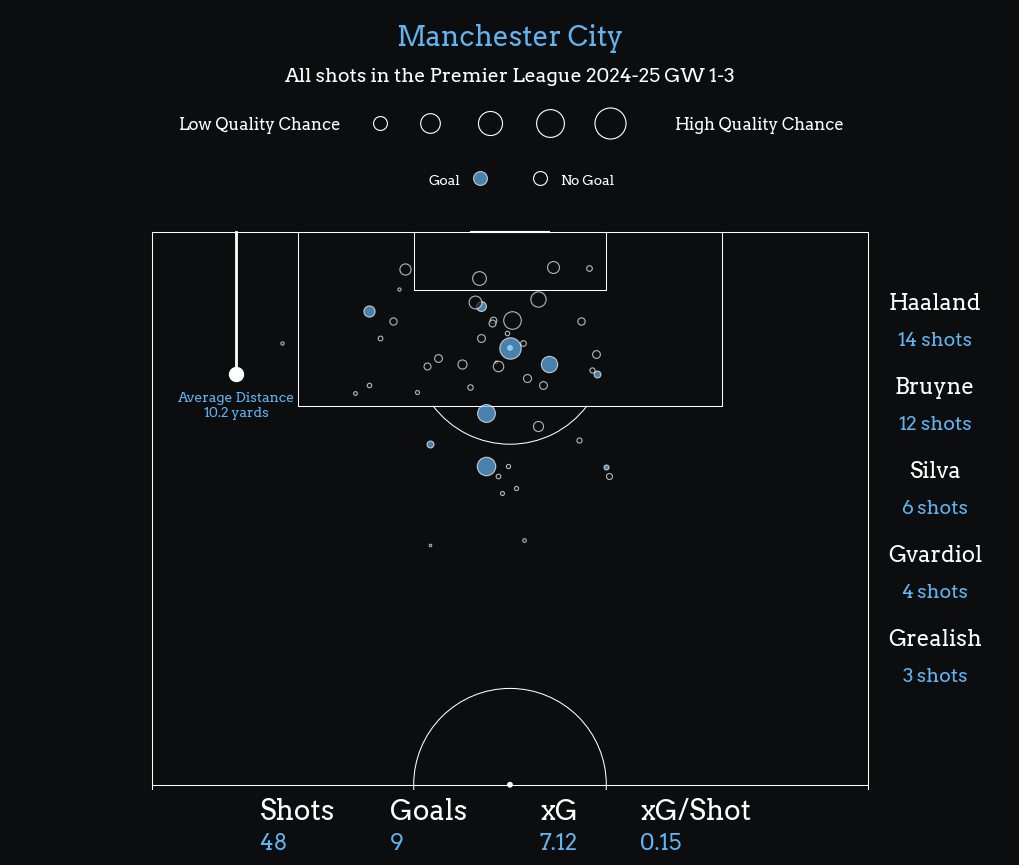

In [124]:
# create a subplot with 2 rows and 1 column
fig = plt.figure(figsize=(10, 12))
fig.patch.set_facecolor(background_color)
 
# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)


ax1.text(
    x=0.5, 
    y=.85, 
    s='Manchester City', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='#62b4f1', 
    ha='center'
)
ax1.text(
    x=0.5, 
    y=.7, 
    s=f'All shots in the Premier League 2024-25 GW 1-3', 
    fontsize=14,
    fontweight='bold',
    fontproperties=font_props, 
    color='white', 
    ha='center'
)
ax1.text(
    x=0.25, 
    y=0.5, 
    s=f'Low Quality Chance', 
    fontsize=12, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)

# add a scatter point between the two texts
ax1.scatter(
    x=0.37, 
    y=0.53, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.42, 
    y=0.53, 
    s=200, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.48, 
    y=0.53, 
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.54, 
    y=0.53, 
    s=400, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.6, 
    y=0.53, 
    s=500, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.75, 
    y=0.5, 
    s=f'High Quality Chance', 
    fontsize=12, 
    fontproperties=font_props, 
    color='white', 
    ha='center'
)


ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='#62b4f1', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)


# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=60, 
    y=points_average_distance, 
    s=105, 
    color='white',  
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [60, 60], 
    [105, points_average_distance], 
    color='white', 
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=60, 
    y=points_average_distance - 4, 
    s=f'Average Distance\n{actual_average_distance:.1f} yards', 
    fontsize=10, 
    fontproperties=font_props, 
    color='#62b4f1', 
    ha='center'
)


for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['x'], 
        x['y'], 
        s=300 * x['expectedGoals'], 
        color='#62b4f1' if x['eventType'] == 'Goal' else background_color, 
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )
  
ax2.set_axis_off()

# add another axis for the stats
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.25, 
    y=.5, 
    s='Shots', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.25, 
    y=0, 
    s=f'{total_shots}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#62b4f1', 
    ha='left'
)

ax3.text(
    x=0.38, 
    y=.5, 
    s='Goals', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.38, 
    y=0, 
    s=f'{total_goals}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#62b4f1', 
    ha='left'
)

ax3.text(
    x=0.53, 
    y=.5, 
    s='xG', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.53, 
    y=0, 
    s=f'{total_xG:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#62b4f1', 
    ha='left'
)

ax3.text(
    x=0.63, 
    y=.5, 
    s='xG/Shot', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.63, 
    y=0, 
    s=f'{xG_per_shot:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#62b4f1', 
    ha='left'
)

ax3.set_axis_off()


# 4. Add another axis for the top 3 players
ax4 = fig.add_axes([.9, 0.45, .05, .2])  # Adjust the positioning as needed
ax4.set_facecolor(background_color)
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)

# 5. Plot the top 3 players
for i, row in top_players.iterrows():
    ax4.text(
        x=0.5, 
        y=1 - i*0.35,  # Adjust y position for each player
        s=f"{row['lastName']}", 
        fontsize=16, 
        fontproperties=font_props, 
        color='white', 
        ha='center'
    )
    ax4.text(
        x=0.5, 
        y=0.85 - i*0.35,  # Position below the last name
        s=f"{row['shotCount']} shots", 
        fontsize=14, 
        fontproperties=font_props, 
        color='#62b4f1', 
        ha='center'
    )

ax4.set_axis_off()

In [125]:
# Save the figure
#plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/MatchReports/CityAway/31-08-2024/{team1}V{team2}_Report.png',dpi=500,bbox_inches = 'tight',facecolor=background)
fig.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/MatchReports/CityShots.png', facecolor=background_color, bbox_inches='tight')

## Data Transformations

In [295]:
city_events_df.columns

Index(['league', 'season', 'game', 'id', 'game_id', 'period', 'minute',
       'second', 'expanded_minute', 'type', 'outcome_type', 'team_id', 'team',
       'player_id', 'player', 'x', 'y', 'end_x', 'end_y', 'goal_mouth_y',
       'goal_mouth_z', 'blocked_x', 'blocked_y', 'qualifiers', 'is_touch',
       'is_shot', 'is_goal', 'card_type', 'related_event_id',
       'related_player_id'],
      dtype='object')

In [154]:
city_events_df['type'].unique()

array(['FormationSet', 'Start', 'Pass', 'KeeperPickup', 'BallTouch',
       'TakeOn', 'Tackle', 'BallRecovery', 'Claim', 'Dispossessed',
       'Foul', 'BlockedPass', 'Save', 'CornerAwarded', 'SavedShot',
       'Interception', 'MissedShots', 'Challenge', 'Clearance', 'Goal',
       'OffsidePass', 'OffsideProvoked', 'Aerial', 'OffsideGiven',
       'FormationChange', 'End', 'SubstitutionOff', 'SubstitutionOn',
       'ShieldBallOpp', 'Card', 'KeeperSweeper', 'PenaltyFaced', 'Error',
       'ShotOnPost', 'Punch'], dtype=object)

In [296]:
# temprary use of typeId of period column
city_events_df['period'] = city_events_df['period'].replace({'FirstHalf': 1, 'SecondHalf': 2, 'FirstPeriodOfExtraTime': 3, 'SecondPeriodOfExtraTime': 4, 
                                     'PenaltyShootout': 5, 'PostGame': 14, 'PreMatch': 16})

C:\Users\acer\AppData\Local\Temp\ipykernel_11332\3640537564.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  city_events_df['period'] = city_events_df['period'].replace({'FirstHalf': 1, 'SecondHalf': 2, 'FirstPeriodOfExtraTime': 3, 'SecondPeriodOfExtraTime': 4,


In [309]:
def cumulative_match_mins(events_df):
    events_out = pd.DataFrame()
    # Add cumulative time to events data, resetting for each unique match
    match_events = events_df.copy()
    match_events['cumulative_mins'] = match_events['minute'] + (1/60) * match_events['second']
    # Add time increment to cumulative minutes based on period of game.
    for period in np.arange(1, match_events['period'].max() + 1, 1):
        if period > 1:
            t_delta = match_events[match_events['period'] == period - 1]['cumulative_mins'].max() - \
                                   match_events[match_events['period'] == period]['cumulative_mins'].min()
        elif period == 1 or period == 5:
            t_delta = 0
        else:
            t_delta = 0
        match_events.loc[match_events['period'] == period, 'cumulative_mins'] += t_delta
    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events])
    return events_out

df = cumulative_match_mins(city_events_df)

In [310]:
df.columns

Index(['league', 'season', 'game', 'id', 'game_id', 'period', 'minute',
       'second', 'expanded_minute', 'type', 'outcome_type', 'team_id', 'team',
       'player_id', 'player', 'x', 'y', 'end_x', 'end_y', 'goal_mouth_y',
       'goal_mouth_z', 'blocked_x', 'blocked_y', 'qualifiers', 'is_touch',
       'is_shot', 'is_goal', 'card_type', 'related_event_id',
       'related_player_id', 'cumulative_mins'],
      dtype='object')

In [311]:
# Extracting the carry data and merge it with the main df, This part is also taken from the "jakeyk11.github.io" github repository and modified for my use
# Extracting the carry data and merge it with the main df, This part is also taken from the "jakeyk11.github.io" github repository and modified for my use
def insert_ball_carries(events_df, min_carry_length=3, max_carry_length=60, min_carry_duration=1, max_carry_duration=10):
    events_out = pd.DataFrame()
    # Carry conditions (convert from metres to opta)
    min_carry_length = 3.0
    max_carry_length = 60.0
    min_carry_duration = 1.0
    max_carry_duration = 10.0
    # match_events = events_df[events_df['match_id'] == match_id].reset_index()
    match_events = events_df.reset_index()
    match_carries = pd.DataFrame()
    
    for idx, match_event in match_events.iterrows():

        if idx < len(match_events) - 1:
            prev_evt_team = match_event['team_id']
            next_evt_idx = idx + 1
            init_next_evt = match_events.loc[next_evt_idx]
            take_ons = 0
            incorrect_next_evt = True

            while incorrect_next_evt:

                next_evt = match_events.loc[next_evt_idx]

                if next_evt['type'] == 'TakeOn' and next_evt['outcome_type'] == 'Successful':
                    take_ons += 1
                    incorrect_next_evt = True

                elif ((next_evt['type'] == 'TakeOn' and next_evt['outcome_type'] == 'Unsuccessful')
                      or (next_evt['team_id'] != prev_evt_team and next_evt['type'] == 'Challenge' and next_evt['outcome_type'] == 'Unsuccessful')
                      or (next_evt['type'] == 'Foul')):
                    incorrect_next_evt = True

                else:
                    incorrect_next_evt = False

                next_evt_idx += 1

            # Apply some conditioning to determine whether carry criteria is satisfied
            same_team = prev_evt_team == next_evt['team_id']
            not_ball_touch = match_event['type'] != 'BallTouch'
            dx = 105*(match_event['end_x'] - next_evt['x'])/100
            dy = 68*(match_event['end_y'] - next_evt['y'])/100
            far_enough = dx ** 2 + dy ** 2 >= min_carry_length ** 2
            not_too_far = dx ** 2 + dy ** 2 <= max_carry_length ** 2
            dt = 60 * (next_evt['cumulative_mins'] - match_event['cumulative_mins'])
            min_time = dt >= min_carry_duration
            same_phase = dt < max_carry_duration
            same_period = match_event['period'] == next_evt['period']

            valid_carry = same_team & not_ball_touch & far_enough & not_too_far & min_time & same_phase &same_period

            if valid_carry:
                carry = pd.DataFrame()
                prev = match_event
                nex = next_evt

                carry.loc[0, 'id'] = prev['id'] + 0.5
                carry['minute'] = np.floor(((init_next_evt['minute'] * 60 + init_next_evt['second']) + (
                        prev['minute'] * 60 + prev['second'])) / (2 * 60))
                carry['second'] = (((init_next_evt['minute'] * 60 + init_next_evt['second']) +
                                    (prev['minute'] * 60 + prev['second'])) / 2) - (carry['minute'] * 60)
                carry['team_id'] = nex['team_id']
                carry['x'] = prev['end_x']
                carry['y'] = prev['end_y']
                carry['expanded_minute'] = np.floor(((init_next_evt['expanded_minute'] * 60 + init_next_evt['second']) +
                                                    (prev['expanded_minute'] * 60 + prev['second'])) / (2 * 60))
                carry['period'] = nex['period']
                carry['type'] = carry.apply(lambda x: {'value': 99, 'displayName': 'Carry'}, axis=1)
                carry['outcome_type'] = 'Successful'
                carry['qualifiers'] = carry.apply(lambda x: {'type': {'value': 999, 'displayName': 'takeOns'}, 'value': str(take_ons)}, axis=1)
                carry['satisfiedEventsTypes'] = carry.apply(lambda x: [], axis=1)
                carry['is_touch'] = True
                carry['player_id'] = nex['player_id']
                carry['end_x'] = nex['x']
                carry['end_y'] = nex['y']
                carry['blocked_x'] = np.nan
                carry['blocked_y'] = np.nan
                carry['goal_mouth_z'] = np.nan
                carry['goal_mouth_y'] = np.nan
                carry['is_shot'] = np.nan
                carry['related_event_id'] = nex['id']
                carry['related_player_id'] = np.nan
                carry['is_goal'] = np.nan
                carry['cardType'] = np.nan
                carry['isOwnGoal'] = np.nan
                carry['type'] = 'Carry'
                carry['player'] = nex['player']
                carry['cumulative_mins'] = (prev['cumulative_mins'] + init_next_evt['cumulative_mins']) / 2

                match_carries = pd.concat([match_carries, carry], ignore_index=True, sort=False)

    match_events_and_carries = pd.concat([match_carries, match_events], ignore_index=True, sort=False)
    match_events_and_carries = match_events_and_carries.sort_values(['period', 'cumulative_mins']).reset_index(drop=True)

    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events_and_carries])

    return events_out

df = insert_ball_carries(df, min_carry_length=3, max_carry_length=60, min_carry_duration=1, max_carry_duration=10)

In [312]:
df = df.reset_index(drop=True)
df['index'] = range(1, len(df) + 1)
df = df[['index'] + [col for col in df.columns if col != 'index']]

In [313]:
df.columns

Index(['index', 'id', 'minute', 'second', 'team_id', 'x', 'y',
       'expanded_minute', 'period', 'type', 'outcome_type', 'qualifiers',
       'satisfiedEventsTypes', 'is_touch', 'player_id', 'end_x', 'end_y',
       'blocked_x', 'blocked_y', 'goal_mouth_z', 'goal_mouth_y', 'is_shot',
       'related_event_id', 'related_player_id', 'is_goal', 'cardType',
       'isOwnGoal', 'player', 'cumulative_mins', 'league', 'season', 'game',
       'game_id', 'team', 'card_type'],
      dtype='object')

In [316]:
# Assign xT values
df_base  = df
dfxT = df_base.copy()
dfxT['qualifiers'] = dfxT['qualifiers'].astype(str)
dfxT = dfxT[(~dfxT['qualifiers'].str.contains('Corner'))]
dfxT = dfxT[(dfxT['type'].isin(['Pass', 'Carry'])) & (dfxT['outcome_type']=='Successful')]


# xT = pd.read_csv('https://raw.githubusercontent.com/mckayjohns/youtube-videos/main/data/xT_Grid.csv', header=None) # use this if you don't have your own xT value Grid
xT = pd.read_csv(r"C:\Users\acer\Documents\GitHub\IndianCitizen\DataViz\xT_Grid.csv", header=None)    # use this if you have your own xT value Grid, then place your file path here
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

dfxT['x1_bin_xT'] = pd.cut(dfxT['x'], bins=xT_cols, labels=False)
dfxT['y1_bin_xT'] = pd.cut(dfxT['y'], bins=xT_rows, labels=False)
dfxT['x2_bin_xT'] = pd.cut(dfxT['end_x'], bins=xT_cols, labels=False)
dfxT['y2_bin_xT'] = pd.cut(dfxT['end_y'], bins=xT_rows, labels=False)

dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)

dfxT['xT'] = dfxT['end_zone_value_xT'] - dfxT['start_zone_value_xT']
columns_to_drop = ['id', 'minute', 'second', 'team_id', 'x', 'y',
       'expanded_minute', 'period', 'type', 'outcome_type', 'qualifiers',
       'satisfiedEventsTypes', 'is_touch', 'player_id', 'end_x', 'end_y',
       'blocked_x', 'blocked_y', 'goal_mouth_z', 'goal_mouth_y', 'is_shot',
       'related_event_id', 'related_player_id', 'is_goal', 'cardType',
       'isOwnGoal', 'player', 'cumulative_mins', 'league', 'season', 'game',
       'game_id', 'team', 'card_type']
dfxT.drop(columns=columns_to_drop, inplace=True)

df = df.merge(dfxT, on='index', how='left')

C:\Users\acer\AppData\Local\Temp\ipykernel_11332\2192730036.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
C:\Users\acer\AppData\Local\Temp\ipykernel_11332\2192730036.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)


In [317]:
# Reshaping the data from 100x100 to 105x68, as I use the pitch_type='uefa', in the pitch function, you can consider according to your use
df['x'] = df['x']*1.05
df['y'] = df['y']*0.68
df['end_x'] = df['end_x']*1.05
df['end_y'] = df['end_y']*0.68
df['goal_mouth_y'] = df['goal_mouth_y']*0.68

df['qualifiers'] = df['qualifiers'].astype(str)
# Calculating passing distance, to find out progressive pass, this will just show the distance reduced by a pass, then will be able to filter passes which has reduced distance value more than 10yds as a progressive pass
df['prog_pass'] = np.where((df['type'] == 'Pass'), 
                           np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['end_x'])**2 + (34 - df['end_y'])**2), 0)
# Calculating carrying distance, to find out progressive carry, this will just show the distance reduced by a carry, then will be able to filter carries which has reduced distance value more than 10yds as a progressive carry
df['prog_carry'] = np.where((df['type'] == 'Carry'), 
                            np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['end_x'])**2 + (34 - df['end_y'])**2), 0)
df['pass_or_carry_angle'] = np.degrees(np.arctan2(df['end_y'] - df['y'], df['end_x'] - df['x']))

# Making all the alphabets in the name as English Alphabets only (for example: Á will be replaced by A)
df['player'] = df['player'].astype(str)
df['player'] = df['player'].apply(unidecode)

In [318]:
# Function to extract short names
def get_short_name(full_name):
    if pd.isna(full_name):
        return full_name
    parts = full_name.split()
    if len(parts) == 1:
        return full_name  # No need for short name if there's only one word
    elif len(parts) == 2:
        return parts[0][0] + ". " + parts[1]
    else:
        return parts[0][0] + ". " + parts[1][0] + ". " + " ".join(parts[2:])

# Applying the function to create 'shortName' column
df['shortName'] = df['player'].apply(get_short_name)

In [319]:
# function to get possession chains, This part is also taken from the "jakeyk11.github.io" github repository and modified for my use
def get_possession_chains(events_df, chain_check, suc_evts_in_chain):
    # Initialise output
    events_out = pd.DataFrame()
    match_events_df = df.reset_index()

    # Isolate valid event types that contribute to possession
    match_pos_events_df = match_events_df[~match_events_df['type'].isin(['OffsideGiven', 'CornerAwarded','Start', 'Card', 'SubstitutionOff',
                                                                                  'SubstitutionOn', 'FormationChange','FormationSet', 'End'])].copy()

    # Add temporary binary outcome and team identifiers
    match_pos_events_df['outcomeBinary'] = (match_pos_events_df['outcome_type']
                                                .apply(lambda x: 1 if x == 'Successful' else 0))
    match_pos_events_df['team'] = match_pos_events_df['team'].astype(str)
    match_pos_events_df['teamBinary'] = (match_pos_events_df['team']
                         .apply(lambda x: 1 if x == min(match_pos_events_df['team']) else 0))
    match_pos_events_df['goalBinary'] = ((match_pos_events_df['type'] == 'Goal')
                         .astype(int).diff(periods=1).apply(lambda x: 1 if x < 0 else 0))

    # Create a dataframe to investigate possessions chains
    pos_chain_df = pd.DataFrame()

    # Check whether each event is completed by same team as the next (check_evts-1) events
    for n in np.arange(1, chain_check):
        pos_chain_df[f'evt_{n}_same_team'] = abs(match_pos_events_df['teamBinary'].diff(periods=-n))
        pos_chain_df[f'evt_{n}_same_team'] = pos_chain_df[f'evt_{n}_same_team'].apply(lambda x: 1 if x > 1 else x)
    pos_chain_df['enough_evt_same_team'] = pos_chain_df.sum(axis=1).apply(lambda x: 1 if x < chain_check - suc_evts_in_chain else 0)
    pos_chain_df['enough_evt_same_team'] = pos_chain_df['enough_evt_same_team'].diff(periods=1)
    pos_chain_df[pos_chain_df['enough_evt_same_team'] < 0] = 0

    match_pos_events_df['period'] = pd.to_numeric(match_pos_events_df['period'], errors='coerce')
    # Check there are no kick-offs in the upcoming (check_evts-1) events
    pos_chain_df['upcoming_ko'] = 0
    for ko in match_pos_events_df[(match_pos_events_df['goalBinary'] == 1) | (match_pos_events_df['period'].diff(periods=1))].index.values:
        ko_pos = match_pos_events_df.index.to_list().index(ko)
        pos_chain_df.iloc[ko_pos - suc_evts_in_chain:ko_pos, 5] = 1

    # Determine valid possession starts based on event team and upcoming kick-offs
    pos_chain_df['valid_pos_start'] = (pos_chain_df.fillna(0)['enough_evt_same_team'] - pos_chain_df.fillna(0)['upcoming_ko'])

    # Add in possession starts due to kick-offs (period changes and goals).
    pos_chain_df['kick_off_period_change'] = match_pos_events_df['period'].diff(periods=1)
    pos_chain_df['kick_off_goal'] = ((match_pos_events_df['type'] == 'Goal')
                     .astype(int).diff(periods=1).apply(lambda x: 1 if x < 0 else 0))
    pos_chain_df.loc[pos_chain_df['kick_off_period_change'] == 1, 'valid_pos_start'] = 1
    pos_chain_df.loc[pos_chain_df['kick_off_goal'] == 1, 'valid_pos_start'] = 1

    # Add first possession manually
    pos_chain_df['team'] = match_pos_events_df['team']
    pos_chain_df.loc[pos_chain_df.head(1).index, 'valid_pos_start'] = 1
    pos_chain_df.loc[pos_chain_df.head(1).index, 'possession_id'] = 1
    pos_chain_df.loc[pos_chain_df.head(1).index, 'possession_team'] = pos_chain_df.loc[pos_chain_df.head(1).index, 'team']

    # Iterate through valid possession starts and assign them possession ids
    valid_pos_start_id = pos_chain_df[pos_chain_df['valid_pos_start'] > 0].index

    possession_id = 2
    for idx in np.arange(1, len(valid_pos_start_id)):
        current_team = pos_chain_df.loc[valid_pos_start_id[idx], 'team']
        previous_team = pos_chain_df.loc[valid_pos_start_id[idx - 1], 'team']
        if ((previous_team == current_team) & (pos_chain_df.loc[valid_pos_start_id[idx], 'kick_off_goal'] != 1) &
                (pos_chain_df.loc[valid_pos_start_id[idx], 'kick_off_period_change'] != 1)):
            pos_chain_df.loc[valid_pos_start_id[idx], 'possession_id'] = np.nan
        else:
            pos_chain_df.loc[valid_pos_start_id[idx], 'possession_id'] = possession_id
            pos_chain_df.loc[valid_pos_start_id[idx], 'possession_team'] = pos_chain_df.loc[valid_pos_start_id[idx], 'team']
            possession_id += 1

    # Assign possession id and team back to events dataframe
    match_events_df = pd.merge(match_events_df, pos_chain_df[['possession_id', 'possession_team']], how='left', left_index=True, right_index=True)

    # Fill in possession ids and possession team
    match_events_df[['possession_id', 'possession_team']] = (match_events_df[['possession_id', 'possession_team']].fillna(method='ffill'))
    match_events_df[['possession_id', 'possession_team']] = (match_events_df[['possession_id', 'possession_team']].fillna(method='bfill'))

    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events_df])

    return events_out

df = get_possession_chains(df, 5, 3)

C:\Users\acer\AppData\Local\Temp\ipykernel_11332\3394797414.py:73: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  match_events_df[['possession_id', 'possession_team']] = (match_events_df[['possession_id', 'possession_team']].fillna(method='ffill'))
C:\Users\acer\AppData\Local\Temp\ipykernel_11332\3394797414.py:74: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  match_events_df[['possession_id', 'possession_team']] = (match_events_df[['possession_id', 'possession_team']].fillna(method='bfill'))


In [320]:
df['period'] = df['period'].replace({1: 'FirstHalf', 2: 'SecondHalf', 3: 'FirstPeriodOfExtraTime', 4: 'SecondPeriodOfExtraTime', 
                                     5: 'PenaltyShootout', 14: 'PostGame', 16: 'PreMatch'})

# final df is ready here
df = df[df['period']!='PenaltyShootout']
df = df.reset_index(drop=True)

## Player Dashboard

### PassMap

In [250]:
def individual_passMap(ax, pname):
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color='#0C0D0E', line_color='white', linewidth=2)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.5, 105.5)
    ax.set_ylim(-0.5, 68.5)

    dfpass = df[(df['type']=='Pass') & (df['player']==pname)]
    acc_pass = dfpass[dfpass['outcome_type']=='Successful']
    iac_pass = dfpass[dfpass['outcome_type']=='Unsuccessful']
    
    if len(dfpass) != 0:
        accurate_pass_perc = round((len(acc_pass)/len(dfpass))*100, 2)
    else:
        accurate_pass_perc = 0
    
    pro_pass = acc_pass[(acc_pass['prog_pass']>=9.11) & (acc_pass['x']>=35) &
                        (~acc_pass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    Thr_ball = dfpass[(dfpass['qualifiers'].str.contains('Throughball')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    Thr_ball_acc = Thr_ball[Thr_ball['outcome_type']=='Successful']
    Lng_ball = dfpass[(dfpass['qualifiers'].str.contains('Longball')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    Lng_ball_acc = Lng_ball[Lng_ball['outcome_type']=='Successful']
    Crs_pass = dfpass[(dfpass['qualifiers'].str.contains('Cross')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    Crs_pass_acc = Crs_pass[Crs_pass['outcome_type']=='Successful']
    key_pass = dfpass[dfpass['qualifiers'].str.contains('KeyPass')]
    big_chnc = dfpass[dfpass['qualifiers'].str.contains('BigChanceCreated')]
    df_no_carry = df[df['type']!='Carry'].reset_index(drop=True)
    pre_asst = df_no_carry[(df_no_carry['qualifiers'].shift(-1).str.contains('IntentionalGoalAssist')) & (df_no_carry['type']=='Pass') & 
                           (df_no_carry['outcome_type']=='Successful') &  (df_no_carry['player']==pname)]
    shot_buildup = df_no_carry[(df_no_carry['qualifiers'].shift(-1).str.contains('KeyPass')) & (df_no_carry['type']=='Pass') & 
                           (df_no_carry['outcome_type']=='Successful') &  (df_no_carry['player']==pname)]
    g_assist = dfpass[dfpass['qualifiers'].str.contains('IntentionalGoalAssist')]
    fnl_thd = acc_pass[(acc_pass['end_x']>=70) & (~acc_pass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    pen_box = acc_pass[(acc_pass['end_x']>=88.5) & (acc_pass['end_y']>=13.6) & (acc_pass['end_y']<=54.4) & 
                       (~acc_pass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    frwd_pass = dfpass[(dfpass['pass_or_carry_angle']>= -85) & (dfpass['pass_or_carry_angle']<= 85) & 
                       (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    back_pass = dfpass[((dfpass['pass_or_carry_angle']>= 95) & (dfpass['pass_or_carry_angle']<= 180) | 
                        (dfpass['pass_or_carry_angle']>= -180) & (dfpass['pass_or_carry_angle']<= -95)) &
                       (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    side_pass = dfpass[((dfpass['pass_or_carry_angle']>= 85) & (dfpass['pass_or_carry_angle']<= 95) | 
                        (dfpass['pass_or_carry_angle']>= -95) & (dfpass['pass_or_carry_angle']<= -85)) & 
                       (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    frwd_pass_acc = frwd_pass[frwd_pass['outcome_type']=='Successful']
    back_pass_acc = back_pass[back_pass['outcome_type']=='Successful']
    side_pass_acc = side_pass[side_pass['outcome_type']=='Successful']
    corners = dfpass[dfpass['qualifiers'].str.contains('CornerTaken')]
    corners_acc = corners[corners['outcome_type']=='Successful']
    freekik = dfpass[dfpass['qualifiers'].str.contains('Freekick')]
    freekik_acc = freekik[freekik['outcome_type']=='Successful']
    thins = dfpass[dfpass['qualifiers'].str.contains('ThrowIn')]
    thins_acc = thins[thins['outcome_type']=='Successful']
    lngball = dfpass[(dfpass['qualifiers'].str.contains('Longball')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    lngball_acc = lngball[lngball['outcome_type']=='Successful']

    if len(frwd_pass) != 0:
        Forward_Pass_Accuracy = round((len(frwd_pass_acc)/len(frwd_pass))*100, 2)
    else:
        Forward_Pass_Accuracy = 0
    
    df_xT_inc = dfpass[dfpass['xT']>0]
    df_xT_dec = dfpass[dfpass['xT']<0]
    xT_by_Pass = dfpass['xT'].sum().round(2)

    #pitch.lines(iac_pass.x, iac_pass.y, iac_pass.end_x, iac_pass.end_y, color='gray', lw=4, alpha=0.15, comet=True, zorder=2, ax=ax)
    #pitch.lines(acc_pass.x, acc_pass.y, acc_pass.end_x, acc_pass.end_y, color='blue', lw=2, alpha=0.15, comet=True, zorder=2, ax=ax)
    #pitch.lines(pro_pass.x, pro_pass.y, pro_pass.end_x, pro_pass.end_y, color='green'      , lw=3, alpha=1,    comet=True, zorder=3, ax=ax)
    #pitch.lines(key_pass.x, key_pass.y, key_pass.end_x, key_pass.end_y, color='yellow',     lw=4, alpha=1,    comet=True, zorder=4, ax=ax)
    #pitch.lines(g_assist.x, g_assist.y, g_assist.end_x, g_assist.end_y, color='#62b4f1',      lw=4, alpha=1,    comet=True, zorder=5, ax=ax)

    #ax.scatter(iac_pass.x, iac_pass.y, s=30, color='white',    edgecolor='red', alpha=1, zorder=2)
    ax.scatter(acc_pass.x, acc_pass.y, s=30, color='white',    edgecolor='#eff4f7', alpha=0.2, zorder=1)
    ax.scatter(pro_pass.x, pro_pass.y, s=40, color='white',  edgecolor= '#0d5d12',  alpha=1, zorder=2)
    ax.scatter(key_pass.x, key_pass.y, s=50, color='white',  edgecolor='#dae718', alpha=1, zorder=3)
    ax.scatter(g_assist.x, g_assist.y, s=50, color='white',  edgecolor= '#2da3da', alpha=1, zorder=4)
    ax.scatter(pen_box.x, pen_box.y, s=50, color='white',  edgecolor= 'red', alpha=1, zorder=3)
    ax.scatter(lngball_acc.x, lngball_acc.y, s=50, color='white',  edgecolor= '#d741cc', alpha=1, zorder=3)

    #pitch.arrows(iac_pass.x, iac_pass.y, iac_pass.end_x, iac_pass.end_y, color='gray', width=1, alpha=0.1, zorder=2, ax=ax)
    pitch.arrows(acc_pass.x, acc_pass.y, acc_pass.end_x, acc_pass.end_y, color='#eff4f7', width=1, alpha=0.2, zorder=1, ax=ax)
    pitch.arrows(pro_pass.x, pro_pass.y, pro_pass.end_x, pro_pass.end_y, color='#0d5d12', width=3, alpha=0.9,zorder=2, ax=ax)
    pitch.arrows(key_pass.x, key_pass.y, key_pass.end_x, key_pass.end_y, color='#dae718',width=3, alpha=0.9, zorder=3, ax=ax)
    pitch.arrows(g_assist.x, g_assist.y, g_assist.end_x, g_assist.end_y, color='#2da3da',width=3, alpha=0.9, zorder=4, ax=ax)
    pitch.arrows(pen_box.x, pen_box.y, pen_box.end_x, pen_box.end_y, color='red',width=3, alpha=0.9, zorder=3, ax=ax)
    pitch.arrows(lngball_acc.x, lngball_acc.y, lngball_acc.end_x, lngball_acc.end_y, color='#d741cc',width=3, alpha=0.7, zorder=3, ax=ax)


    ax.set_title(f"PassMap", color='white',fontproperties=font_props, fontsize=25, fontweight='bold', y=1.03)
    ax_text(0, -3, f'''<Accurate Pass: {len(acc_pass)}/{len(dfpass)} ({accurate_pass_perc}%)> | <Progressive Pass: {len(pro_pass)}> | <Chances Created: {len(key_pass)}>
Big Chances Created: {len(big_chnc)} | <Assists: {len(g_assist)}> | Pre-Assist: {len(pre_asst)} | Build-up to Shot: {len(shot_buildup)}
Final third Passes: {len(fnl_thd)} | <Passes into Penalty box: {len(pen_box)}> | Crosses (Acc.): {len(Crs_pass)} ({len(Crs_pass_acc)})
<Accurate Longballs (Attempted): {len(lngball_acc)} ({len(lngball)})> | xT from Pass(Sum): {xT_by_Pass}
''', color='white', highlight_textprops=[{'color':'#eff4f7'},{'color':'#0d5d12'}, {'color':'#dae718'}, {'color':'#2da3da'},{'color':'red'},{'color':'#d741cc'}],fontproperties=font_props, fontsize=15, ha='left', va='top', ax=ax)
    # Open-Play Forward Pass (Acc.): {len(frwd_pass)} ({len(frwd_pass_acc)})
    # Open-Play Side Pass (Acc.): {len(side_pass)} ({len(side_pass_acc)})
    # Open-Play Back Pass (Acc.): {len(back_pass)} ({len(back_pass_acc)})
    # xT decreased as passer: {df_xT_dec['xT'].sum().round(2)}
    
    return

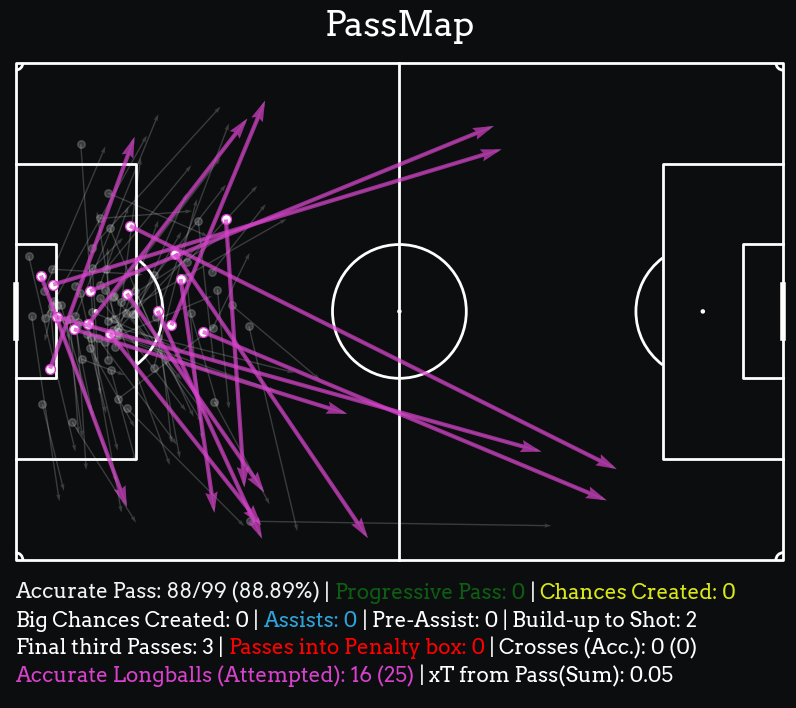

In [557]:
fig,ax=plt.subplots(figsize=(10,12))
fig.patch.set_facecolor('#0C0D0E')
from highlight_text import ax_text, fig_text
pname = 'Ederson'
individual_passMap(ax, pname)

### Carries

In [485]:
def individual_carry(ax,pname):
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color='#0C0D0E', line_color='white', linewidth=2)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.5,105.5)
    ax.set_ylim(-0.5,68.5)

    df_carry = df[(df['type']=='Carry') & (df['player']==pname)]
    led_shot1 = df[(df['type']=='Carry') & (df['player']==pname) & (df['qualifiers'].shift(-1).str.contains('KeyPass'))]
    led_shot2 = df[(df['type']=='Carry') & (df['player']==pname) & (df['type'].shift(-1).str.contains('Shot'))]
    led_shot = pd.concat([led_shot1, led_shot2])
    led_goal1 = df[(df['type']=='Carry') & (df['player']==pname) & (df['qualifiers'].shift(-1).str.contains('IntentionalGoalAssist'))]
    led_goal2 = df[(df['type']=='Carry') & (df['player']==pname) & (df['type'].shift(-1)=='Goal')]
    led_goal = pd.concat([led_goal1, led_goal2])
    pro_carry = df_carry[(df_carry['prog_carry']>=9.11) & (df_carry['x']>=35)]
    fth_carry = df_carry[(df_carry['x']<70) & (df_carry['end_x']>=70)]
    box_entry = df_carry[(df_carry['end_x']>=88.5) & (df_carry['end_y']>=13.6) & (df_carry['end_y']<=54.4) &
                 ~((df_carry['x']>=88.5) & (df_carry['y']>=13.6) & (df_carry['y']<=54.6))]
    disp = df[(df['type']=='Carry') & (df['player']==pname) & (df['type'].shift(-1)=='Dispossessed')]
    df_to = df[(df['type']=='TakeOn') & (df['player']==pname)]
    t_ons = df_to[df_to['outcome_type']=='Successful']
    t_onu = df_to[df_to['outcome_type']=='Unsuccessful']
    df_xT_inc = df_carry[df_carry['xT']>0]
    df_xT_dec = df_carry[df_carry['xT']<0]
    xT_by_Carry = df_carry['xT'].sum().round(2)
    df_carry = df_carry.copy()
    df_carry.loc[:, 'Length'] = np.sqrt((df_carry['x'] - df_carry['end_x'])**2 + (df_carry['y'] - df_carry['end_y'])**2)
    median_length = round(df_carry['Length'].median(),2)
    total_length = round(df_carry['Length'].sum(),2)
    if len(df_to)!=0:
        success_rate = round((len(t_ons)/len(df_to))*100, 2)
    else:
        success_rate = 0

    for index, row in df_carry.iterrows():
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), color='white', alpha=0.25, arrowstyle='->', linestyle='--', 
                                   linewidth=2, mutation_scale=15, zorder=2)
        ax.add_patch(arrow)
    for index, row in pro_carry.iterrows():
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), color='#0d5d12', alpha=1, arrowstyle='->', linestyle='--', linewidth=3, 
                                   mutation_scale=20, zorder=3)
        ax.add_patch(arrow)
    for index, row in led_shot.iterrows():
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), color='violet', alpha=1, arrowstyle='->', linestyle='--', linewidth=4, 
                                   mutation_scale=20, zorder=4)
        ax.add_patch(arrow)
    for index, row in led_goal.iterrows():
        arrow = patches.FancyArrowPatch((row['x'], row['y']), (row['end_x'], row['end_y']), color='red', alpha=1, arrowstyle='->', linestyle='--', linewidth=4, 
                                   mutation_scale=20, zorder=4)
        ax.add_patch(arrow)

    ax.scatter(t_ons.x, t_ons.y, s=250, color='#2aaedc', edgecolor='white', lw=2, zorder=5)
    ax.scatter(t_onu.x, t_onu.y, s=250, color='None', edgecolor='white', hatch='/////', lw=2.5, zorder=5)
    
    #ax.set_title(f"Carries & Dribbles", color='white', fontsize=25, fontweight='bold', y=1.03)
    #ax_text(100, 30, f'''Total Carries: {len(df_carry)} | <Progressive Carries: {len(pro_carry)}> | <Carries Led to Shot: {len(led_shot)}>
#<Carries Led to Goal: {len(led_goal)}> | Carrier Dispossessed: {len(disp)} | Carries into Final third: {len(fth_carry)}
#Carries into pen.box: {len(box_entry)} | Avg. Carry Length: {median_length} m | Total Carry: {total_length} m
#xT from Carries: {xT_by_Carry} | <Successful Dribbles: {len(t_ons)}/{len(df_to)} ({success_rate}%)>
#''', highlight_textprops=[{'color':'#0d5d12'}, {'color':'violet'}, {'color':'red'}, {'color':'#2aaedc'}],color='white', fontsize=15, ha='left', 
#            va='top', ax=ax)

    #ax.set_title(f"Carries & Dribbles", color='white', fontsize=35,fontproperties=font_props, y=1.03, x=0.8)
    ax_text(      
        x=1, 
        y=80, 
        s=f"{pname}'s Carries & Dribbles", 
        fontsize=35,  
        #fontweight='bold', 
        color='white',
        fontproperties=font_props
    )
    ax_text(
        x=29, 
        y=75, 
        s=f'Premier League 2024-25 GW 1-3', 
        fontsize=30,
        fontproperties=font_props, 
        color='white', 
        ha='center'
    )


    img_pname = mpimg.imread(f'C:/Users/acer/Documents/GitHub/IndianCitizen/Images/Players/{pname}.jpg')
    ax_image = add_image(
        img_pname, fig, left=0.96, bottom=0.7, width=0.3, height=0.25,aspect='equal'
    )




    ax_text(105, 60, f'''


    



    
    Total Carries: {len(df_carry)}
    <Progressive Carries: {len(pro_carry)}>
    <Carries Led to Shot: {len(led_shot)}>
    <Carries Led to Goal: {len(led_goal)}>
    <Successful Dribbles: {len(t_ons)}/{len(df_to)} ({success_rate}%)>
    Carrier Dispossessed: {len(disp)}
    Carries into Final Third: {len(fth_carry)}
    Carries into Penalty Box: {len(box_entry)}
    Avg. Carry Length: {median_length} m
    Total Carry Length: {total_length} m
    xT from Carries: {xT_by_Carry}
    ''', 
    highlight_textprops=[{'color':'#0d5d12'}, {'color':'violet'}, {'color':'red'}, {'color':'#2aaedc'}],
    color='white', fontsize=30, ha='left', va='top',fontproperties=font_props, ax=ax)

    # xT decreased as carrier: {df_xT_dec['xT'].sum().round(2)}
    return

# fig,ax=plt.subplots(figsize=(10,10))
# individual_carry(ax, pname)

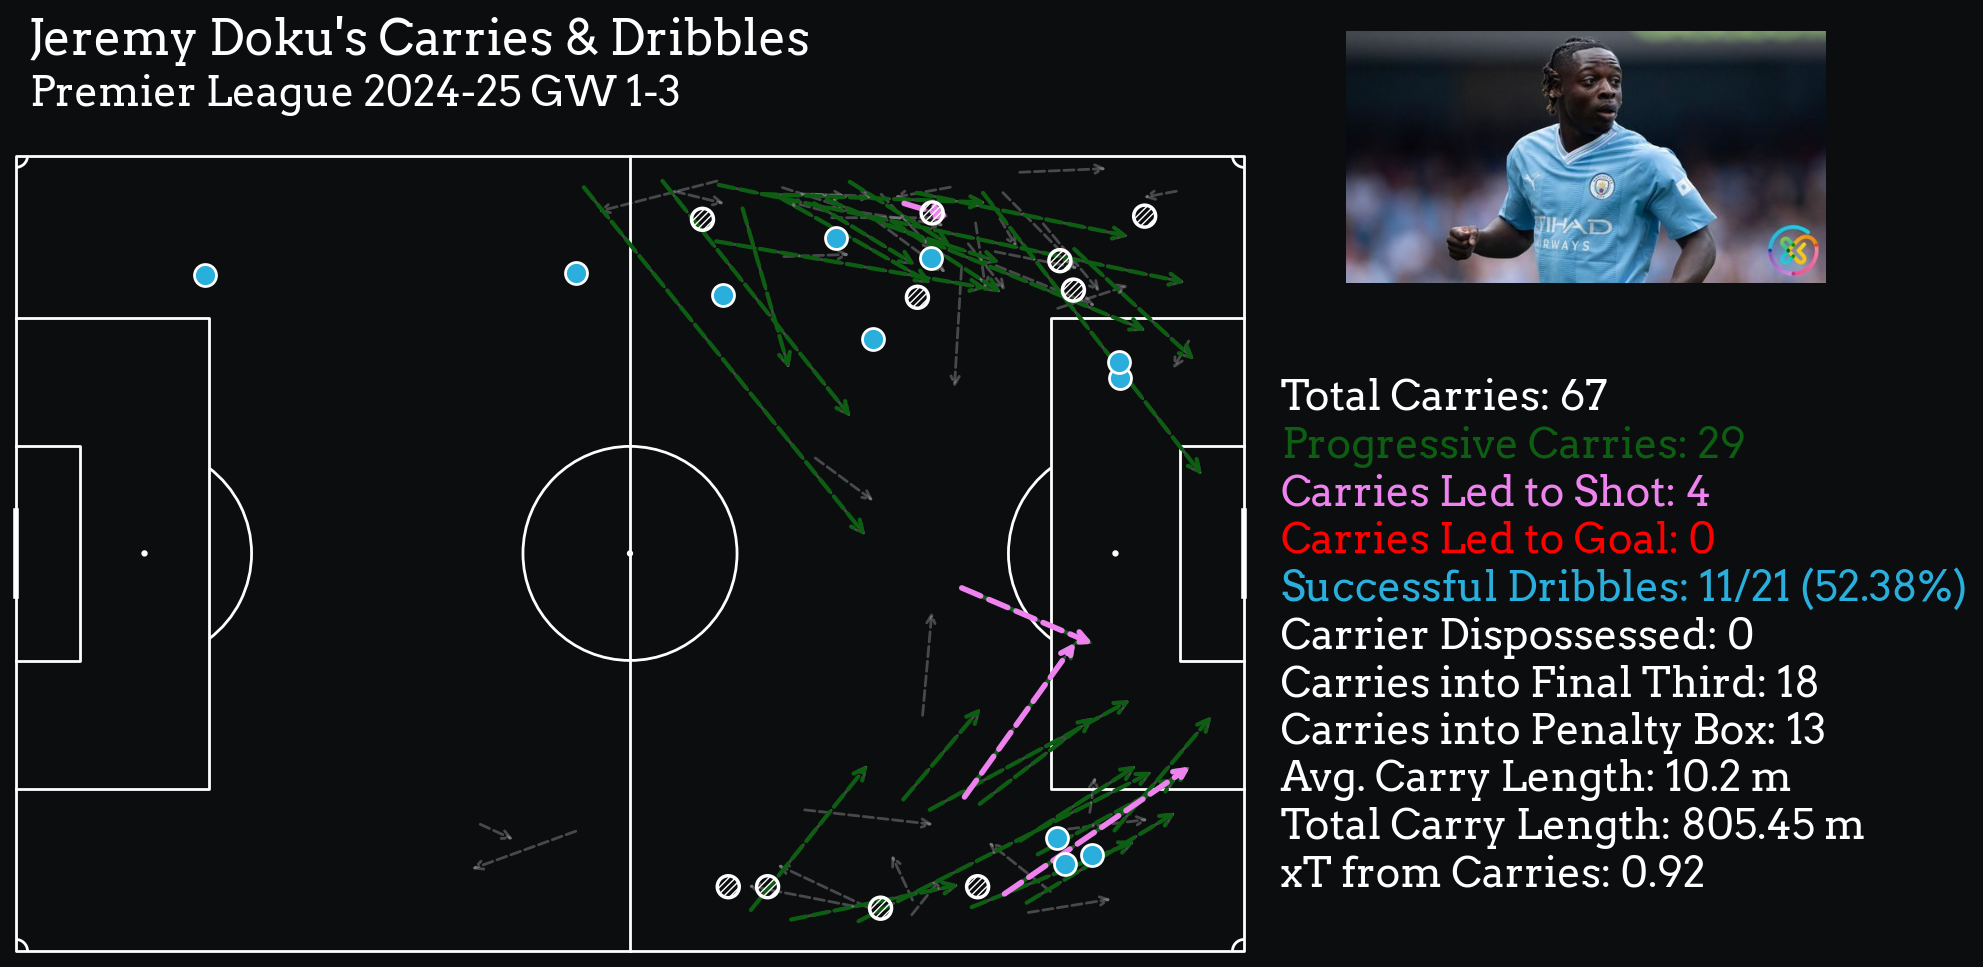

In [487]:
fig,ax=plt.subplots(figsize=(16,12))
fig.patch.set_facecolor('#0C0D0E')
from highlight_text import ax_text, fig_text
pname = 'Jeremy Doku'
individual_carry(ax, pname)

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/PlayerReports/{pname}_Report.png',dpi=500,bbox_inches = 'tight',facecolor=background)

## VIZ-3

In [2]:
df_whoscored_spadl = ws.read_events(match_id=1821078,output_fmt='spadl')

NameError: name 'ws' is not defined

In [543]:
actions = df_whoscored_spadl.copy()

In [1]:
actions.columns

NameError: name 'actions' is not defined

In [545]:
# Dictionary mapping action_id to action_type
action_mapping = {
    0: 'pass',
    1: 'cross',
    2: 'throw in',
    3: 'freekick crossed',
    4: 'freekick short',
    5: 'corner crossed',
    6: 'corner short',
    7: 'take on',
    8: 'foul',
    9: 'tackle',
    10: 'interception',
    11: 'shot',
    12: 'shot penalty',
    13: 'shot freekick',
    14: 'keeper save',
    18: 'clearance',
    21: 'dribble',
    22: 'goalkick'
}
# Map the action_id to action_type
actions['type_name'] = actions['type_id'].map(action_mapping)

# Dictionary mapping action_id to action_type
result_mapping = {
    0: 'failure',
    1: 'success'
}
# Map the action_id to action_type
actions['result'] = actions['result_id'].map(result_mapping)

# Dictionary mapping action_id to action_type
bodypart_mapping = {
    0: 'foot',
    1: 'head',
    2: 'other'
}
# Map the action_id to action_type
actions['bodypart'] = actions['bodypart_id'].map(bodypart_mapping)

In [546]:
actions = actions.sort_values(["game_id","period_id","time_seconds"])

In [550]:
start = 216
delta = 2

a = actions[start:start+delta].copy()

In [551]:
a

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,end_x,start_y,end_y,type_id,result_id,bodypart_id,action_id,player,team,type_name,result,bodypart
216,1821078,2715603749,1,595.0,167,136741.0,30.45,20.265,44.064,38.42,0,1,0,216,Bernardo Silva,Man City,pass,success,foot
217,1821078,2715603757,1,597.0,167,315227.0,13.65,0.000,37.740,31.28,11,1,4,217,Erling Haaland,Man City,shot,success,NaN


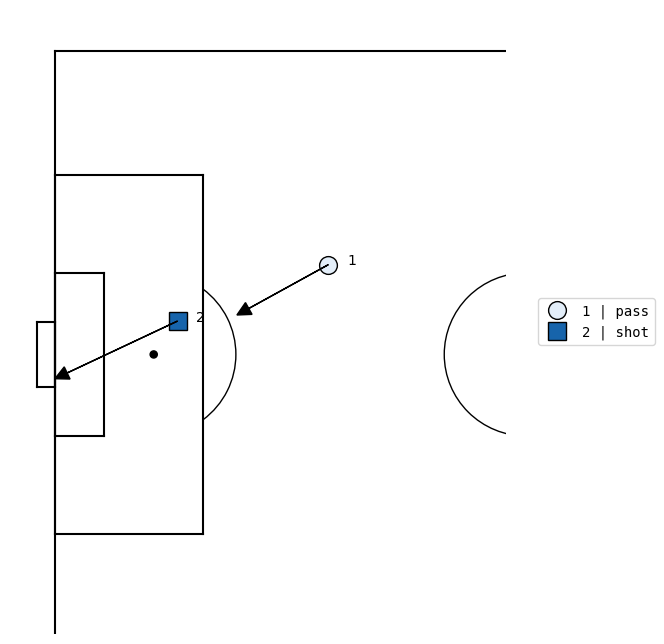

In [556]:
mps.actions(a[["start_x","start_y","end_x","end_y"]],a.type_name,a.result,a.team,zoom=30)